## Model Representation

Para describir el problema de aprendizaje supervisado de manera un poco más formal, nuestro objetivo es, dado un conjunto de entrenamiento, aprender una función h: X → Y para que h (x) sea un "buen" predictor del valor correspondiente de y. Por razones históricas, esta función h se llama hipótesis. Visto pictóricamente, el proceso es así:
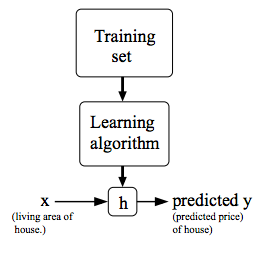

Cuando la variable objetivo que intentamos predecir es continua, como en nuestro ejemplo de vivienda, llamamos al problema de aprendizaje un problema de regresión. Cuando y puede tomar solo un pequeño número de valores discretos (como si, dada la superficie habitable, quisiéramos predecir si una vivienda es una casa o un departamento, por ejemplo), lo llamamos un problema de clasificación.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Ejercicio**

En esta parte de este ejercicio, implementará una regresión lineal con una variable para predecir los beneficios de un camión de comida. Supongamos que usted es el CEO de una franquicia de restaurantes y está considerando diferentes ciudades para abrir una nueva tienda. La cadena ya tiene camiones en varias ciudades y usted tiene datos de beneficios y poblaciones de las ciudades.

In [2]:
datos = pd.read_csv('machine-learning-ex1/ex1/ex1data1.txt', header = None)
datos.columns = ['X','Y']
datos.head(10)

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


C:\Users\Cesar Quezada\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


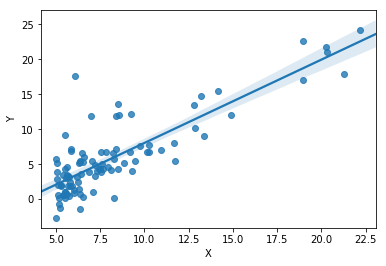

In [3]:
# Ploting data
reg = sns.regplot(x="X", y="Y", data=datos)

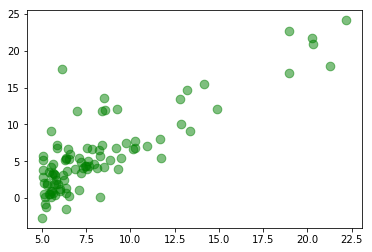

In [4]:
plt.scatter(datos.X,datos.Y, s=75, alpha=0.5, color = 'g')

## Cost Function

Podemos medir la precisión de nuestra función de hipótesis utilizando una función de costo. Esto toma una diferencia promedio (en realidad, una versión más elegante de un promedio) de todos los resultados de la hipótesis con entradas de x y la salida real de y.
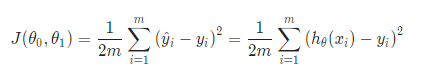

Un diagrama de contorno es un gráfico que contiene muchas líneas de contorno. Una línea de contorno de una función de dos variables tiene un valor constante en todos los puntos de la misma línea. Un ejemplo de tal gráfico es el de la derecha a continuación.
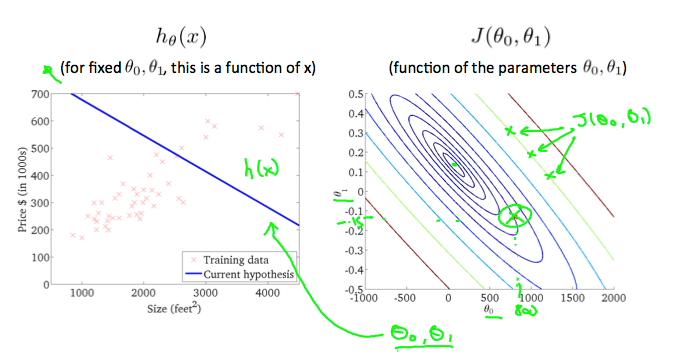

Tomando cualquier color y siguiendo el 'círculo', uno esperaría obtener el mismo valor de la función de costo

In [5]:
# Definiendo los elementos
X = np.hstack((np.ones((datos.X.shape[0], 1)), datos.X.values.reshape(-1,1)))
y = datos.Y.values.reshape(-1,1)
theta = np.zeros((2, 1))

In [24]:
# Configuraciones de descenso de gradiente
iterations = 1500
alpha = 0.01
m = len(y)

In [6]:
# Compute cost for linear regression
def computeCost(X, y, theta):
    m = len(y)
    J = 0
    predictions = X.dot(theta)
    sqrErrors = np.power((predictions - y),2).sum()
    J = 1/(2*m)*(sqrErrors)
    return J   

In [7]:
# Validamos el iniciador
computeCost(X,y,theta)

32.072733877455676

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = length(y)
    J_history = np.zeros((num_iters, 1))
    

In [22]:
np.transpose(X)[1]

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [25]:
theta = theta - (alpha / m) * delta
theta

ValueError: operands could not be broadcast together with shapes (2,1) (97,97) 

In [11]:
for i in range(num_iters):
    h = X.dot(theta)
    errors = h - y
    delta = np.transpose(X)[1] * errors
    theta = theta - (alpha / m) * delta

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Multivariate Linear Regression

La forma multivariable de la función de hipótesis que acomoda estas características múltiples es la siguiente:
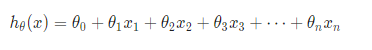

Usando la definición de multiplicación matricial, nuestra función de hipótesis multivariable se puede representar de manera concisa como:
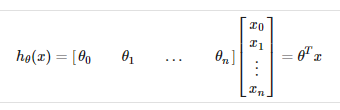

## Gradient Descent for Multiple Variables

La ecuación de descenso de gradiente es generalmente la misma forma; solo tenemos que repetirlo para nuestras características 'n':
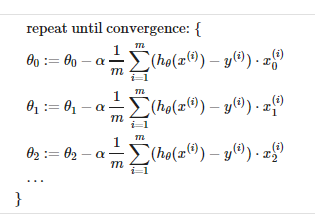

En otras palabras:
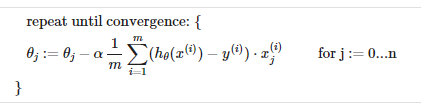